# San Francisco Crime data

Download data here https://www.kaggle.com/c/sf-crime/data

### Import packages etc

In [191]:
%matplotlib inline
import pandas as pd
from pandas import Series,DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Load data

In [192]:
crime_df = pd.read_csv("/Users/KRich/GitHub/data/SF crime/train.csv")
# remove address, resolution and description
crime_df = crime_df.drop(['Address','Resolution','Descript'],axis=1)
crime_df.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


### Sort data and set the order for plotting

In [197]:
# convert dates to datetime
crime_df['Dates']=pd.to_datetime(crime_df["Dates"])
# year data ---------------------------------
crime_df['Year'] =crime_df['Dates'].dt.year
crime_df['Year']=crime_df['Year'].astype(str)
# month data (replace with names)
crime_df['Month']=crime_df['Dates'].dt.month
month_map={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
month_order = [k for k in month_map.values()] 
crime_df['Month'].replace(month_map, inplace=True)
# Hour data -------------------------------------
crime_df['Hour'] =crime_df['Dates'].dt.hour
crime_df['Hour']=crime_df['Hour'].astype(str)
# week data
day_order=['Mon', 'Tue', 'Wed', 
         'Thu', 'Fri', 'Sat', 'Sun']

### Plot

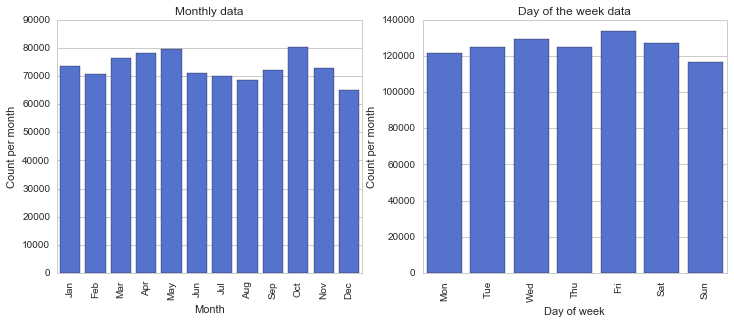

In [134]:
#fig, (axis1, axis2) = plt.subplots(1,2,figsize=(12,5))
#fig2,(axis3, axis4) = plt.subplots(1,2,figsize=(12,5))
plt.figure(figsize=(12,10))
axis1=  plt.subplot2grid((2,2),(0,0))
#-------------------------------------
monthplot = totl = sns.countplot(x='Month', data=crime_df,
                        order=month_order,color="royalblue", ax=axis1)
monthplot.set_xlabel('Month')
monthplot.set_ylabel('Count per month')
monthplot.set_title('Monthly data')
_ = plt.setp(monthplot.get_xticklabels(), rotation=90)


#-------------------------------------
axis2=  plt.subplot2grid((2,2),(0,1))
weekplot = totl = sns.countplot(x='DayOfWeek', data=crime_df,
                        color="royalblue", order=day_order, ax=axis2)
weekplot.set_xlabel('Day of week')
weekplot.set_ylabel('Count per month')
weekplot.set_title('Day of the week data')
_ = plt.setp(weekplot.get_xticklabels(), rotation=90)


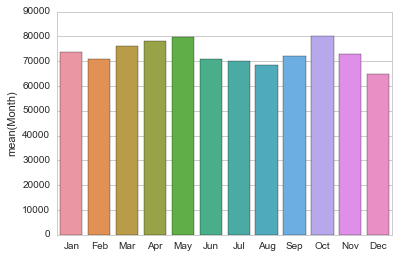

In [143]:
MonthlyData = pd.DataFrame(crime_df["Month"].value_counts())
sns.barplot(x=MonthlyData.index, y="Month", data=MonthlyData, order=month_order)


In [174]:
x = crime_df["Month"].value_counts()
xmax = np.max(x.values)



80274

## Average crimes per month every year
Plot average value (barplot) and check for outliers (boxplot)

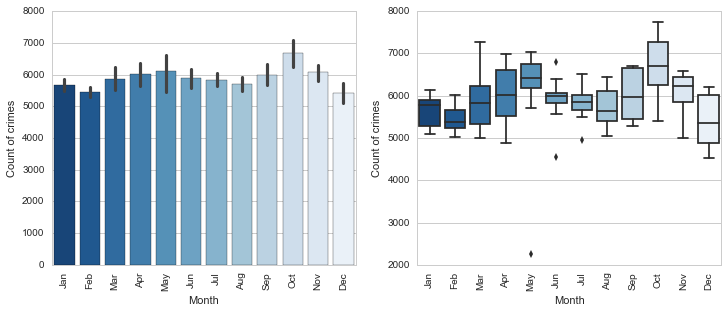

In [219]:
plt.figure(figsize=(12,10))

# average crimes per month each year
axis1=  plt.subplot2grid((2,2),(0,0))
Month_count = crime_df[["Month", "Category","Year"]].groupby(['Month','Year'],as_index=False).count()
#xxx = xx.groupby(['Year'],as_index=False).mean()
monthbar = sns.barplot(x='Month', y='Category', data=Month_count,palette="Blues_r",
                   order=month_order, ax=axis1)
monthbar.set_xlabel('Month')
monthbar.set_ylabel('Count of crimes')
_ = plt.setp(monthbar.get_xticklabels(), rotation=90)


# boxplot, check for outliers
axis2=  plt.subplot2grid((2,2),(0,1))
monthbox = sns.boxplot(x='Month', y='Category', data=Month_count,palette="Blues_r",
                   order=month_order, ax=axis2)
monthbox.set_xlabel('Month')
monthbox.set_ylabel('Count of crimes')
_ = plt.setp(monthbox.get_xticklabels(), rotation=90)


_Note_: There are outliers in May-July. But, the largest is in May, so we should further investigate May to see if we should exclude data for a given year (assuming data is missing). 

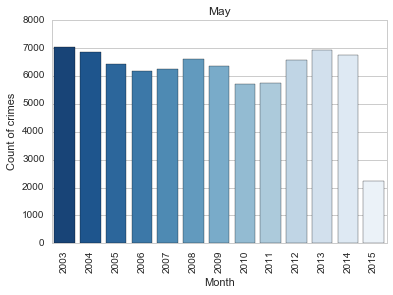

In [232]:
mayvals = crime_df.loc[crime_df['Month'] == 'May']
Month_countx = mayvals[["Category","Year"]].groupby(['Year'],as_index=False).count()
mayplot = sns.barplot(x='Year', y='Category', data=Month_countx,palette="Blues_r")
mayplot.set_xlabel('Month')
mayplot.set_ylabel('Count of crimes')
mayplot.set_title('May')
_ = plt.setp(mayplot.get_xticklabels(), rotation=90)